In [25]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
os.chdir('/home/gangus/cow-tus')

import re
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
metric = 'roc_auc'
query = f"valid/{metric}': "

data = []
for root, dirs, files in os.walk('experiments/proposal/instance-level-learning/ST-2normal_binary/full_size/no_augmentation/all_data/'):
    if 'emmental.log' in files and len(files) == 3:
        with open(osp.join(root, 'emmental.log'), 'r') as f:
            fold_idx = root.index('fold')
            lines = f.readlines()
            primary_metric_str = re.findall(f"{query}[0-9\.]+", "\n".join(lines)) # guaranteed to be in order
            primary_metric_val = max([float(s[len(query):]) for s in primary_metric_str])
            data.append({
                'fold': root[fold_idx: fold_idx +6],
                'root': root,
                'epoch': epoch,
                'metric': metric,
                'query': query,
                f'{metric}': float(primary_metric_val),
            })

In [140]:
data_df = pd.DataFrame(data)

In [156]:
bests = []
fold_groups = data_df.groupby('fold')
for fold, fold_group in fold_groups:
    root_groups = fold_group.groupby('root')
    fold_bests = []
    for root, root_group in root_groups:
        fold_bests.append(root_group[metric].max())
    fold_bests = np.array(fold_bests)
    print(fold)
    print(fold_bests)
    print(np.median(fold_bests), fold_bests.mean(), fold_bests.std())
    bests += list(fold_bests)

fold_1
[0.83312102 0.85846224 0.81856233 0.83048226 0.78362147]
0.8304822565969063 0.824849863512284 0.024368999954065655
fold_2
[0.68003731 0.77028918 0.77810168 0.80979478 0.74503265]
0.7702891791044776 0.7566511194029851 0.04353167937712033
fold_3
[0.67482941 0.72597953 0.74397425 0.76045565 0.73805855]
0.7380585516178737 0.7286594761171032 0.029116110953338565
fold_4
[0.72624744 0.7963944  0.8258715  0.81254272 0.78631237]
0.7963943950786057 0.7894736842105263 0.034387293300118714
fold_5
[0.72119565 0.78532609 0.75932971 0.79583333 0.77083333]
0.7708333333333333 0.7665036231884057 0.025836178878588405


In [143]:
bests = np.array(bests)

In [145]:
np.median(bests)

0.7781016791044776

In [150]:
sorted(bests)

[0.6748294078802552,
 0.6800373134328358,
 0.7211956521739131,
 0.7259795289456308,
 0.7262474367737526,
 0.7380585516178737,
 0.7439742460928902,
 0.7450326492537314,
 0.7593297101449276,
 0.7604556460488665,
 0.7702891791044776,
 0.7708333333333333,
 0.7781016791044776,
 0.783621474067334,
 0.7853260869565217,
 0.7863123718386877,
 0.7958333333333334,
 0.7963943950786057,
 0.809794776119403,
 0.8125427204374573,
 0.8185623293903549,
 0.8258714969241285,
 0.8304822565969063,
 0.8331210191082803,
 0.8584622383985441]

In [155]:
from sklearn.utils import resample
stats = resample(bests, replace=True, n_samples=1000, random_state=1)

alpha = 0.85
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

85.0 confidence interval 68.0% and 83.3%


In [108]:
bests.std()

0.04565457227187473

In [109]:
bests

array([0.83312102, 0.85846224, 0.81856233, 0.83048226, 0.78362147,
       0.68003731, 0.77028918, 0.77810168, 0.80979478, 0.74503265,
       0.67482941, 0.72597953, 0.74397425, 0.76045565, 0.73805855,
       0.72624744, 0.7963944 , 0.8258715 , 0.81254272, 0.78631237,
       0.72119565, 0.78532609, 0.75932971, 0.79583333, 0.77083333])

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Overall')

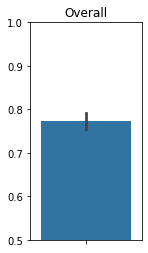

In [129]:
plt.figure(figsize=(2,4))
sns.barplot(y=bests)
plt.ylim(0.5, 1.0)
plt.title('Overall')

Text(0.5, 1.0, 'Each fold, 5 seeds')

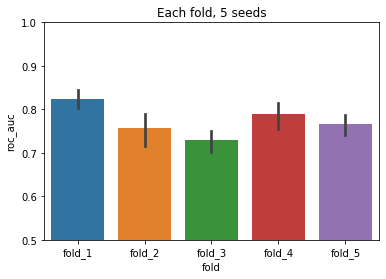

In [130]:
sns.barplot(data=data_df, x='fold', y='roc_auc', order=[f'fold_{k+1}' for k in range(5)])
plt.ylim(0.5, 1.0)
plt.title('Each fold, 5 seeds')